In [2]:
import pandas as pd
import numpy as np
from capstone_group05 import drop_unnecessary_columns, format_and_rename_time_column,fillna_with_mode

In [3]:
# df = pd.read_csv("./Crash_Reporting_-_Drivers_Data.csv")
df = pd.read_csv("https://data.montgomerycountymd.gov/api/views/mmzv-x632/rows.csv?accessType=DOWNLOAD")

/var/folders/q8/yn_y6xld29d7fddhs2p60jz80000gn/T/ipykernel_35133/3124655422.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("https://data.montgomerycountymd.gov/api/views/mmzv-x632/rows.csv?accessType=DOWNLOAD")


In [4]:
df.shape

(171741, 43)

In [5]:
df.head()

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,...,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location
0,MCP3040003N,190026050,Montgomery County Police,Property Damage Crash,05/31/2019 03:00:00 PM,NaN,NaN,NaN,NaN,PARKING LOT OF 3215 SPARTAN RD,...,15,No,No,2004,HONDA,TK,UNKNOWN,39.150044,-77.063089,"(39.15004368, -77.06308884)"
1,MCP1307000K,190024786,Montgomery County Police,Property Damage Crash,05/24/2019 05:00:00 PM,NaN,NaN,NaN,NaN,PARKING LOT,...,0,No,No,0,UNK,UNK,NaN,39.199047,-77.250743,"(39.19904667, -77.25074333)"
2,MCP2846008X,230034260,Montgomery County Police,Property Damage Crash,07/17/2023 10:45:00 AM,County,SELFRIDGE RD,County,RANDOLPH RD,NaN,...,35,No,No,2003,FORD,TK,NO MISUSE,39.054588,-77.085974,"(39.05458848, -77.08597423)"
3,MCP32610017,230034668,Montgomery County Police,Property Damage Crash,07/20/2023 11:40:00 PM,Maryland (State),MUNCASTER MILL RD,County,SHADY GROVE RD,NaN,...,45,No,No,2023,TOYT,CP,NO MISUSE,39.148721,-77.147111,"(39.14872076, -77.14711061)"
4,EJ78520081,230033429,Gaithersburg Police Depar,Property Damage Crash,07/13/2023 05:40:00 PM,Municipality,PERRY PKWY,Unknown,ENT TO SHOPPING CENTER,NaN,...,25,No,No,2001,KENWORTH,TRUCK,NaN,39.149085,-77.210731,"(39.14908542, -77.21073135)"


In [6]:
uncessary_cols=['Latitude','Agency Name','Route Type', 'Road Name', 'Report Number', 'Longitude', 'Location', 'Person ID', 'Vehicle ID', 'Cross-Street Type', 'Cross-Street Name', 'Municipality', 'Off-Road Description']
drop_unnecessary_columns(df,uncessary_cols)

In [7]:
df.shape

(171741, 30)

In [8]:
df.columns

Index(['Local Case Number', 'ACRS Report Type', 'Crash Date/Time',
       'Related Non-Motorist', 'Collision Type', 'Weather',
       'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Non-Motorist Substance Abuse',
       'Driver At Fault', 'Injury Severity', 'Circumstance',
       'Driver Distracted By', 'Drivers License State',
       'Vehicle Damage Extent', 'Vehicle First Impact Location',
       'Vehicle Second Impact Location', 'Vehicle Body Type',
       'Vehicle Movement', 'Vehicle Continuing Dir', 'Vehicle Going Dir',
       'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year',
       'Vehicle Make', 'Vehicle Model', 'Equipment Problems'],
      dtype='object')

In [9]:
format_and_rename_time_column(df,'Crash Date/Time','Crash Time')

In [10]:
null_records = df[df.isnull().any(axis=1)]
null_records

,Local Case Number,ACRS Report Type,Crash Time,Related Non-Motorist,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver Substance Abuse,...,Vehicle Movement,Vehicle Continuing Dir,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems
0,190026050,Property Damage Crash,03:00:00 PM,NaN,OTHER,CLEAR,NaN,DAYLIGHT,NaN,UNKNOWN,...,PARKING,North,North,15,No,No,2004,HONDA,TK,UNKNOWN
1,190024786,Property Damage Crash,05:00:00 PM,NaN,NaN,CLEAR,NaN,DAYLIGHT,NaN,NaN,...,PARKING,Unknown,Unknown,0,No,No,0,UNK,UNK,NaN
2,230034260,Property Damage Crash,10:45:00 AM,NaN,OTHER,CLEAR,DRY,DARK LIGHTS ON,TRAFFIC SIGNAL,UNKNOWN,...,MOVING CONSTANT SPEED,East,East,35,No,No,2003,FORD,TK,NO MISUSE
3,230034668,Property Damage Crash,11:40:00 PM,NaN,OTHER,NaN,DRY,DARK LIGHTS ON,TRAFFIC SIGNAL,NaN,...,MAKING RIGHT TURN,South,East,45,No,No,2023,TOYT,CP,NO MISUSE
4,230033429,Property Damage Crash,05:40:00 PM,NaN,SAME DIR REAR END,NaN,DRY,DAYLIGHT,NO CONTROLS,NaN,...,MOVING CONSTANT SPEED,Unknown,Unknown,25,No,No,2001,KENWORTH,TRUCK,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171736,16010228,Property Damage Crash,10:01:00 AM,NaN,OTHER,CLEAR,DRY,DAYLIGHT,NaN,NaN,...,SLOWING OR STOPPING,East,East,25,No,No,2016,FORD,EXPLORER,NO MISUSE
171737,170519976,Property Damage Crash,02:22:00 PM,NaN,SAME DIR REAR END,CLEAR,DRY,DAYLIGHT,NO CONTROLS,NaN,...,SLOWING OR STOPPING,East,East,35,No,No,2008,NISSAN,ALTIMA,NO MISUSE
171738,200046217,Property Damage Crash,07:37:00 AM,NaN,SAME DIR REAR END,CLOUDY,DRY,DAYLIGHT,NO CONTROLS,NONE DETECTED,...,SLOWING OR STOPPING,North,North,40,No,No,2008,CHEVROLET,EXPRESS,NO MISUSE
171739,190056701,Property Damage Crash,11:23:00 PM,NaN,ANGLE MEETS LEFT TURN,RAINING,WET,DARK LIGHTS ON,TRAFFIC SIGNAL,NONE DETECTED,...,MAKING LEFT TURN,East,South,35,No,No,2018,FORD,TRANSIT VAN,NO MISUSE


In [11]:
null_counts = df.isnull().sum()
null_counts

Local Case Number                      0
ACRS Report Type                       0
Crash Time                             0
Related Non-Motorist              166294
Collision Type                       581
Weather                            13326
Surface Condition                  20061
Light                               1445
Traffic Control                    25425
Driver Substance Abuse             31263
Non-Motorist Substance Abuse      167436
Driver At Fault                        0
Injury Severity                        0
Circumstance                      140477
Driver Distracted By                   0
Drivers License State               9915
Vehicle Damage Extent                316
Vehicle First Impact Location        156
Vehicle Second Impact Location       256
Vehicle Body Type                   2640
Vehicle Movement                     383
Vehicle Continuing Dir              2679
Vehicle Going Dir                   2679
Speed Limit                            0
Driverless Vehic

In [12]:
df.shape

(171741, 30)

In [13]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage

Local Case Number                  0.000000
ACRS Report Type                   0.000000
Crash Time                         0.000000
Related Non-Motorist              96.828364
Collision Type                     0.338300
Weather                            7.759359
Surface Condition                 11.680961
Light                              0.841383
Traffic Control                   14.804269
Driver Substance Abuse            18.203574
Non-Motorist Substance Abuse      97.493318
Driver At Fault                    0.000000
Injury Severity                    0.000000
Circumstance                      81.795844
Driver Distracted By               0.000000
Drivers License State              5.773228
Vehicle Damage Extent              0.183998
Vehicle First Impact Location      0.090834
Vehicle Second Impact Location     0.149062
Vehicle Body Type                  1.537198
Vehicle Movement                   0.223010
Vehicle Continuing Dir             1.559907
Vehicle Going Dir               

In [14]:
for column in df.columns:
    if missing_percentage[column] > 70:
        df.drop(column, axis=1, inplace= True)

In [15]:
df.columns

Index(['Local Case Number', 'ACRS Report Type', 'Crash Time', 'Collision Type',
       'Weather', 'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Driver At Fault', 'Injury Severity',
       'Driver Distracted By', 'Drivers License State',
       'Vehicle Damage Extent', 'Vehicle First Impact Location',
       'Vehicle Second Impact Location', 'Vehicle Body Type',
       'Vehicle Movement', 'Vehicle Continuing Dir', 'Vehicle Going Dir',
       'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year',
       'Vehicle Make', 'Vehicle Model', 'Equipment Problems'],
      dtype='object')

In [16]:
null_counts = df.isnull().sum()
null_counts

Local Case Number                     0
ACRS Report Type                      0
Crash Time                            0
Collision Type                      581
Weather                           13326
Surface Condition                 20061
Light                              1445
Traffic Control                   25425
Driver Substance Abuse            31263
Driver At Fault                       0
Injury Severity                       0
Driver Distracted By                  0
Drivers License State              9915
Vehicle Damage Extent               316
Vehicle First Impact Location       156
Vehicle Second Impact Location      256
Vehicle Body Type                  2640
Vehicle Movement                    383
Vehicle Continuing Dir             2679
Vehicle Going Dir                  2679
Speed Limit                           0
Driverless Vehicle                    0
Parked Vehicle                        0
Vehicle Year                          0
Vehicle Make                         24


In [17]:
fillna_with_mode(df,'Equipment Problems')

In [18]:
null_counts = df.isnull().sum()
null_counts

Local Case Number                     0
ACRS Report Type                      0
Crash Time                            0
Collision Type                      581
Weather                           13326
Surface Condition                 20061
Light                              1445
Traffic Control                   25425
Driver Substance Abuse            31263
Driver At Fault                       0
Injury Severity                       0
Driver Distracted By                  0
Drivers License State              9915
Vehicle Damage Extent               316
Vehicle First Impact Location       156
Vehicle Second Impact Location      256
Vehicle Body Type                  2640
Vehicle Movement                    383
Vehicle Continuing Dir             2679
Vehicle Going Dir                  2679
Speed Limit                           0
Driverless Vehicle                    0
Parked Vehicle                        0
Vehicle Year                          0
Vehicle Make                         24


In [19]:
Columns_to_Drop = ['Weather', 'Surface Condition', 'Drivers License State', 'Driver Substance Abuse', 'Traffic Control', 'Collision Type', 'Light', 'Vehicle Damage Extent', 'Vehicle First Impact Location', 'Vehicle Second Impact Location', 'Vehicle Body Type', 'Vehicle Movement', 'Vehicle Continuing Dir', 'Vehicle Going Dir', 'Vehicle Make', 'Vehicle Model']
df = df.dropna(subset=Columns_to_Drop)

In [20]:
null_counts = df.isnull().sum()
null_counts

Local Case Number                 0
ACRS Report Type                  0
Crash Time                        0
Collision Type                    0
Weather                           0
Surface Condition                 0
Light                             0
Traffic Control                   0
Driver Substance Abuse            0
Driver At Fault                   0
Injury Severity                   0
Driver Distracted By              0
Drivers License State             0
Vehicle Damage Extent             0
Vehicle First Impact Location     0
Vehicle Second Impact Location    0
Vehicle Body Type                 0
Vehicle Movement                  0
Vehicle Continuing Dir            0
Vehicle Going Dir                 0
Speed Limit                       0
Driverless Vehicle                0
Parked Vehicle                    0
Vehicle Year                      0
Vehicle Make                      0
Vehicle Model                     0
Equipment Problems                0
dtype: int64

In [21]:
df.shape

(98525, 27)

In [22]:
df.describe()

,Speed Limit,Vehicle Year
count,98525.000000,98525.000000
mean,35.149353,2009.224786
std,7.869456,97.768742
min,0.000000,0.000000
25%,30.000000,2006.000000
50%,35.000000,2012.000000
75%,40.000000,2015.000000
max,75.000000,9999.000000


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

/Users/Monis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Monis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Monis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


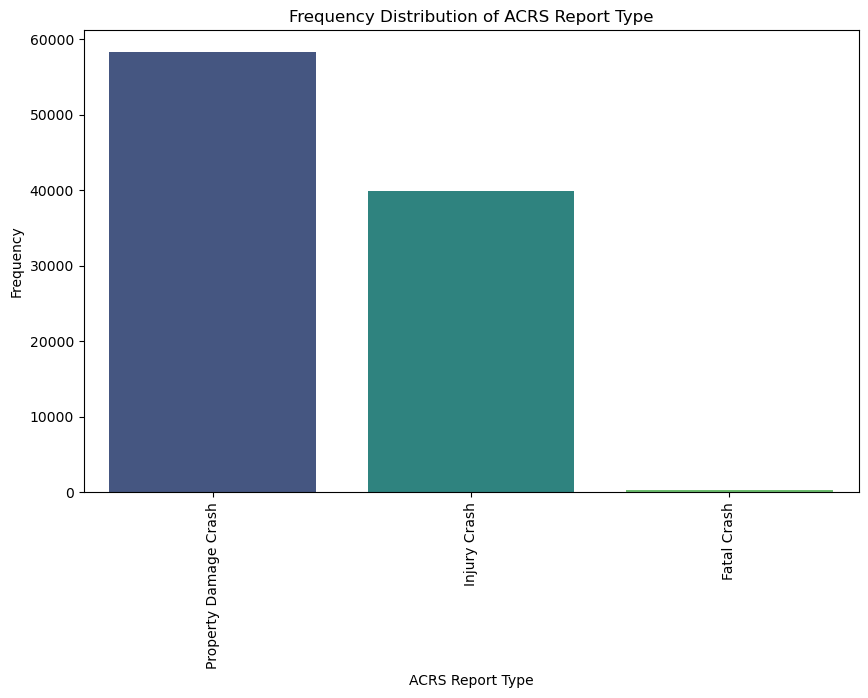

/Users/Monis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Monis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Monis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


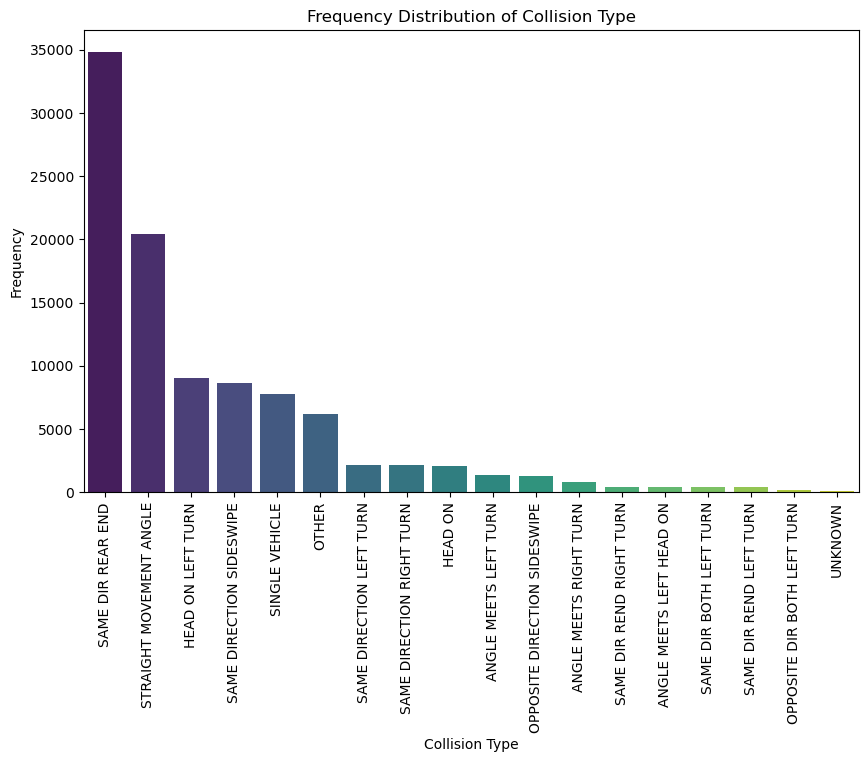

/Users/Monis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Monis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Monis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


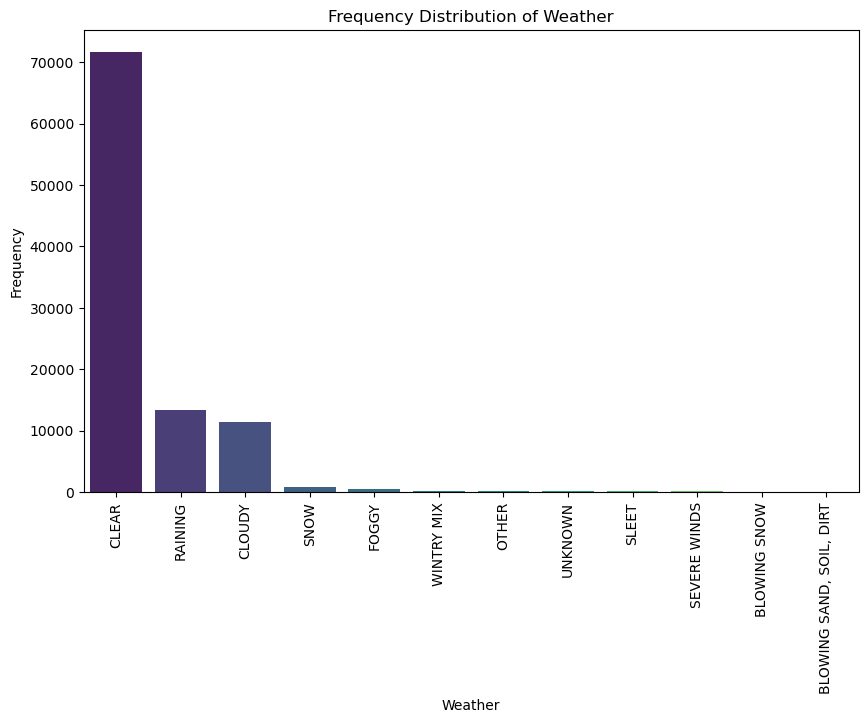

/Users/Monis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Monis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Monis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


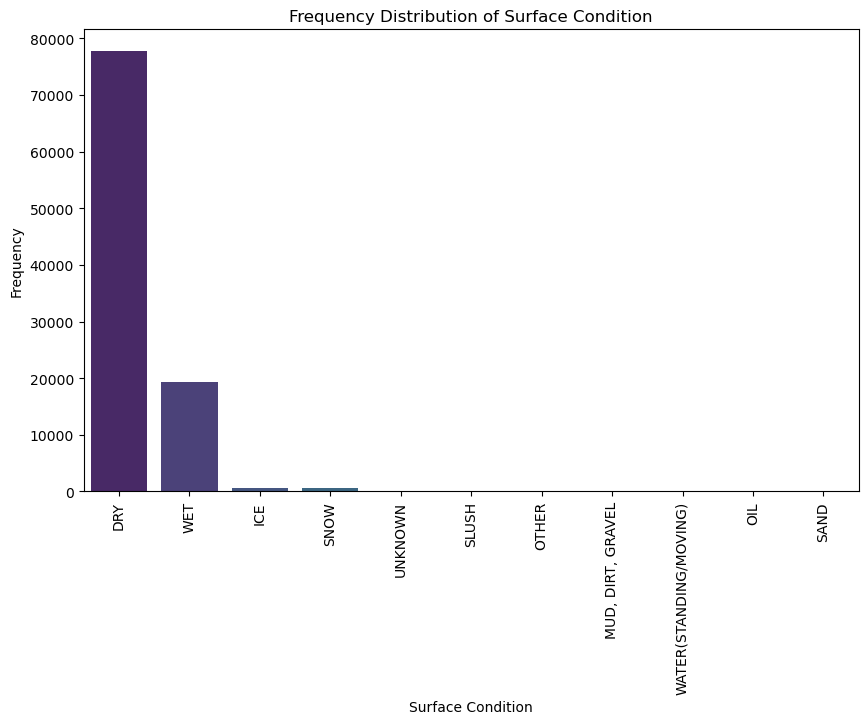

/Users/Monis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Monis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Monis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


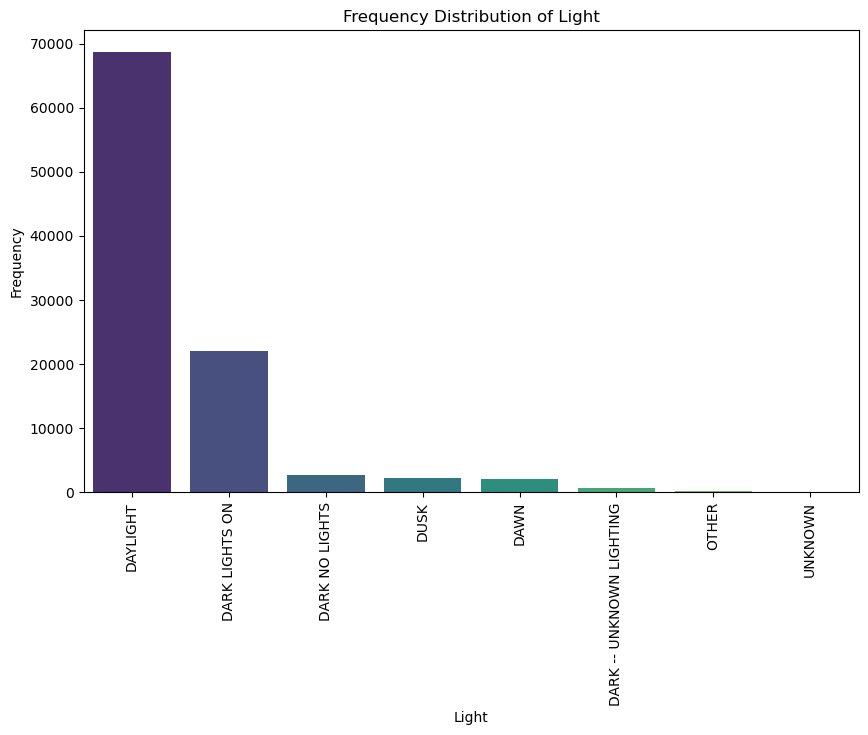

/Users/Monis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Monis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Monis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


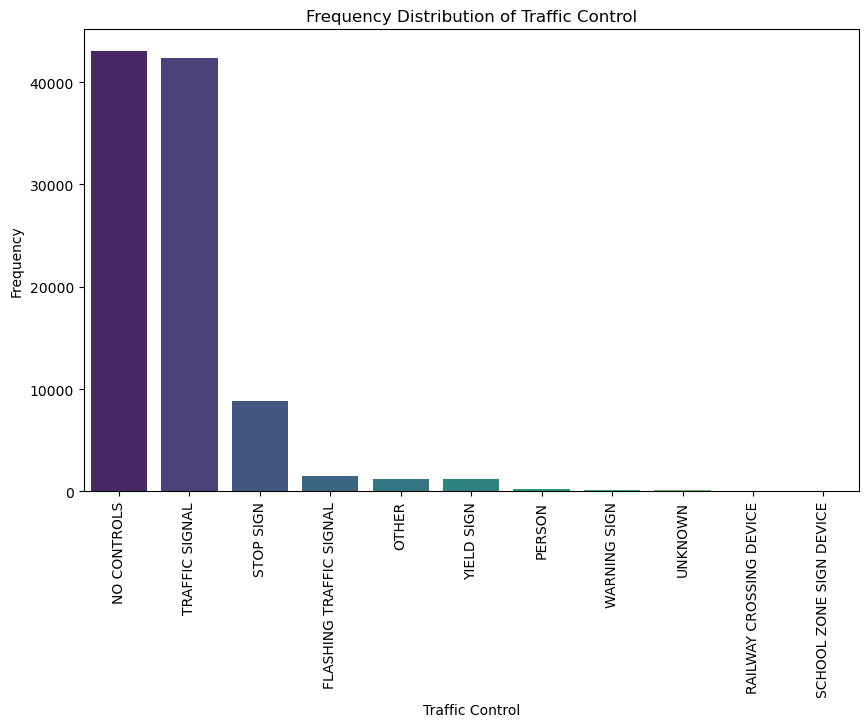

/Users/Monis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Monis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Monis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


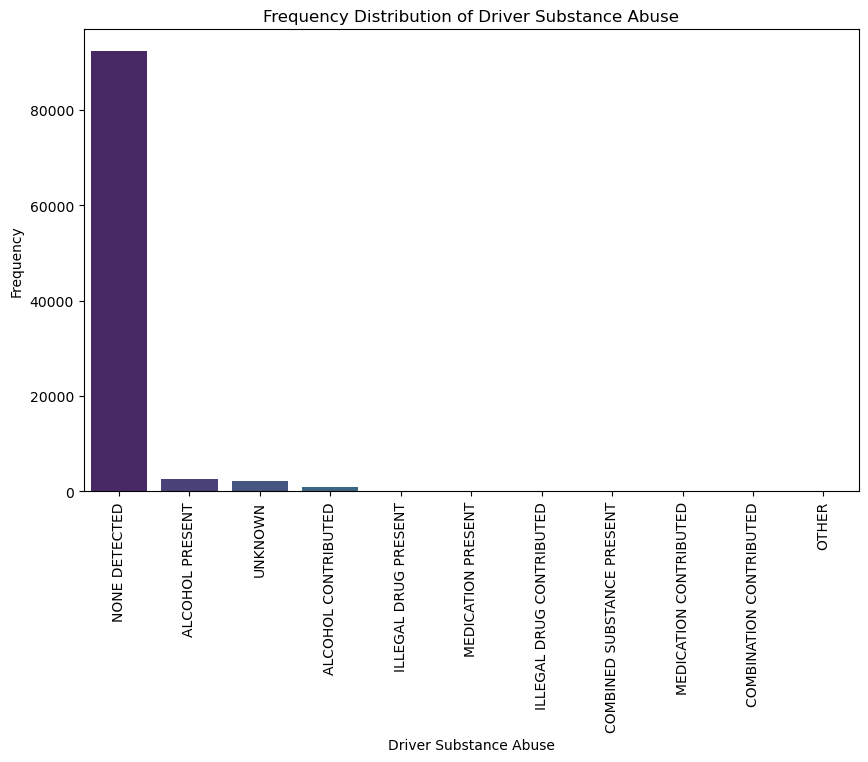

/Users/Monis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Monis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Monis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


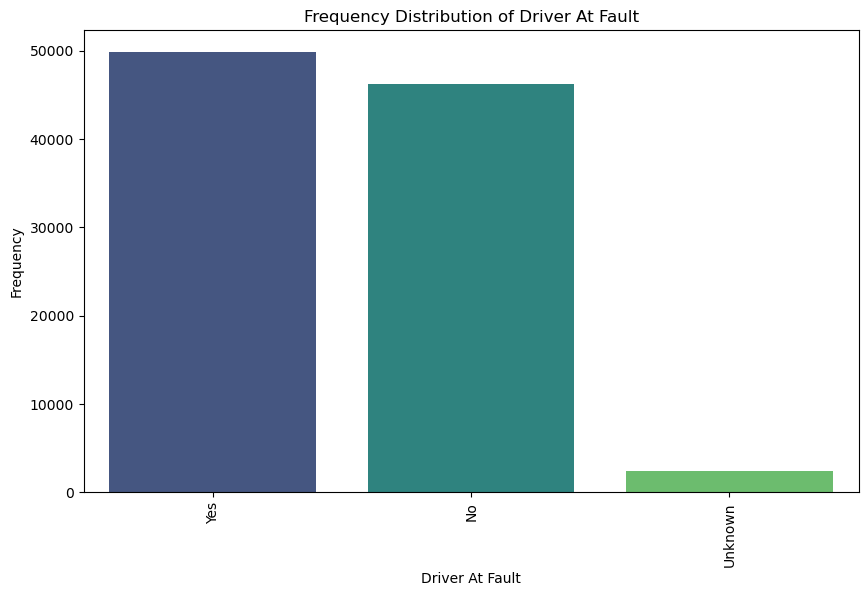

/Users/Monis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Monis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Monis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


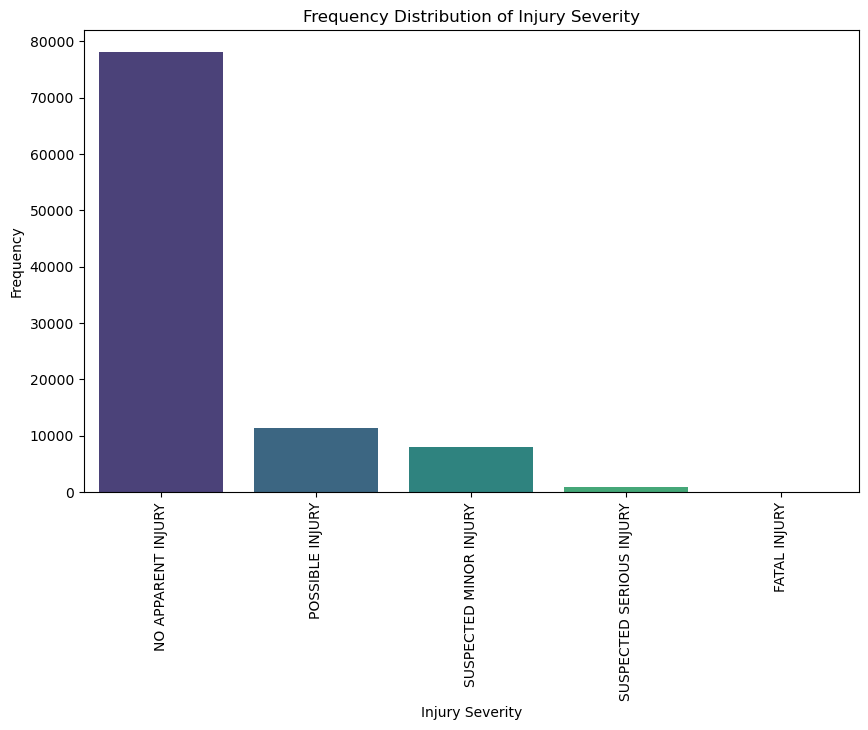

/Users/Monis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Monis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Monis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


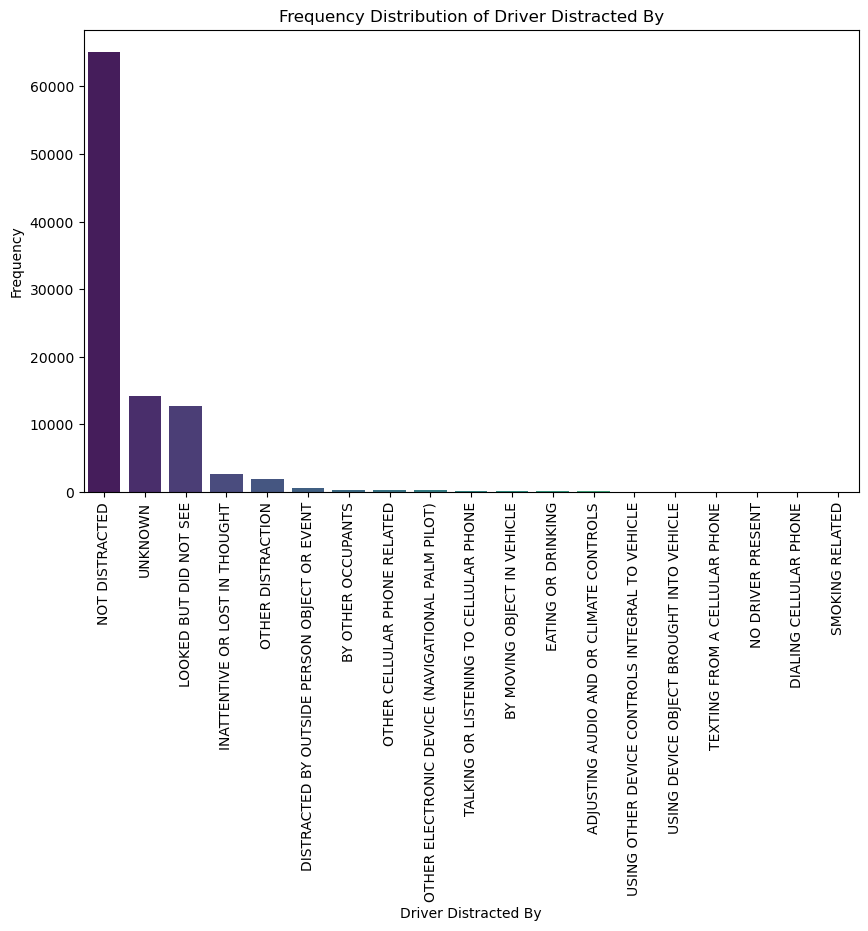

/Users/Monis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Monis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Monis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


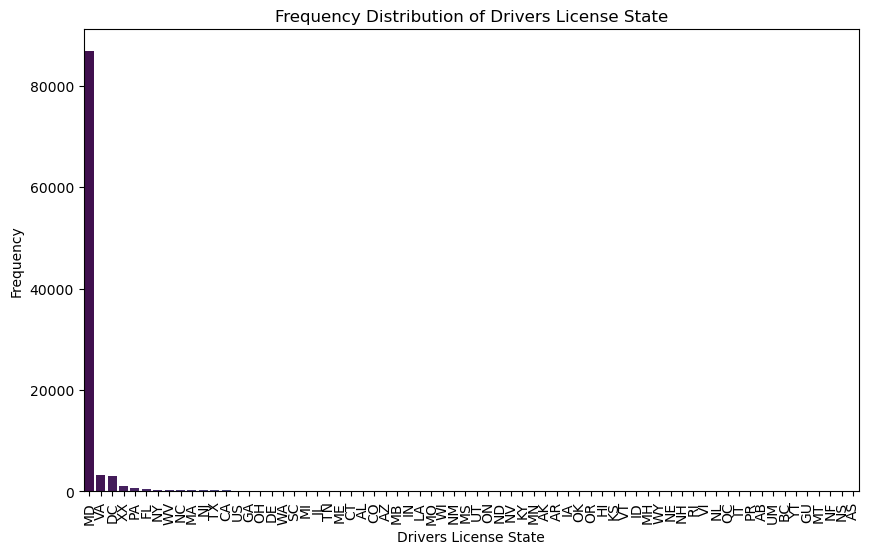

/Users/Monis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Monis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Monis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


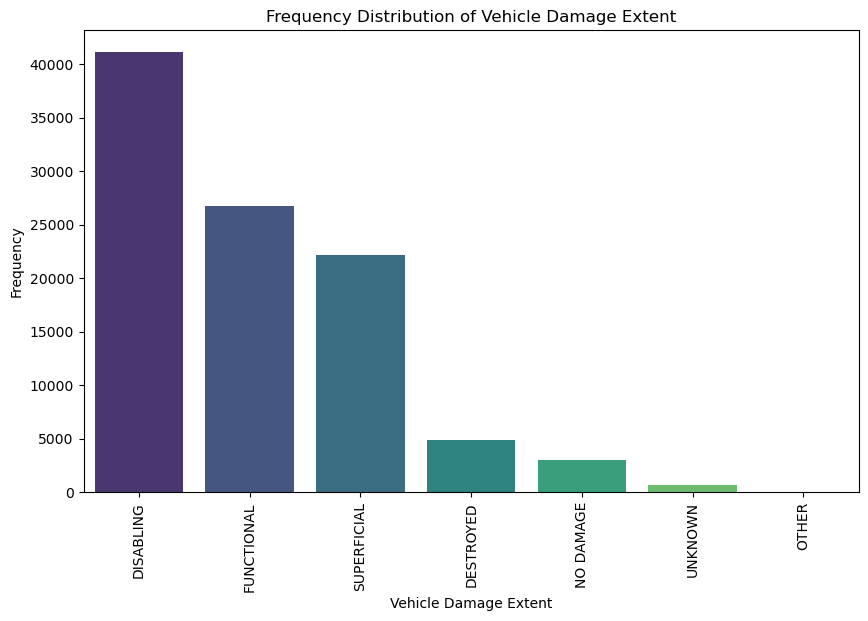

/Users/Monis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Monis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Monis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


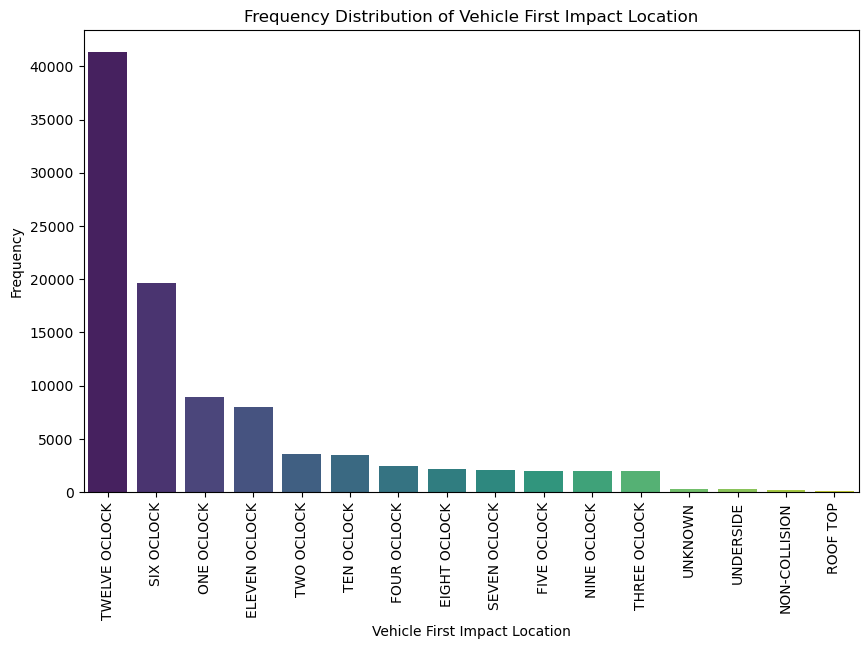

/Users/Monis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Monis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Monis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


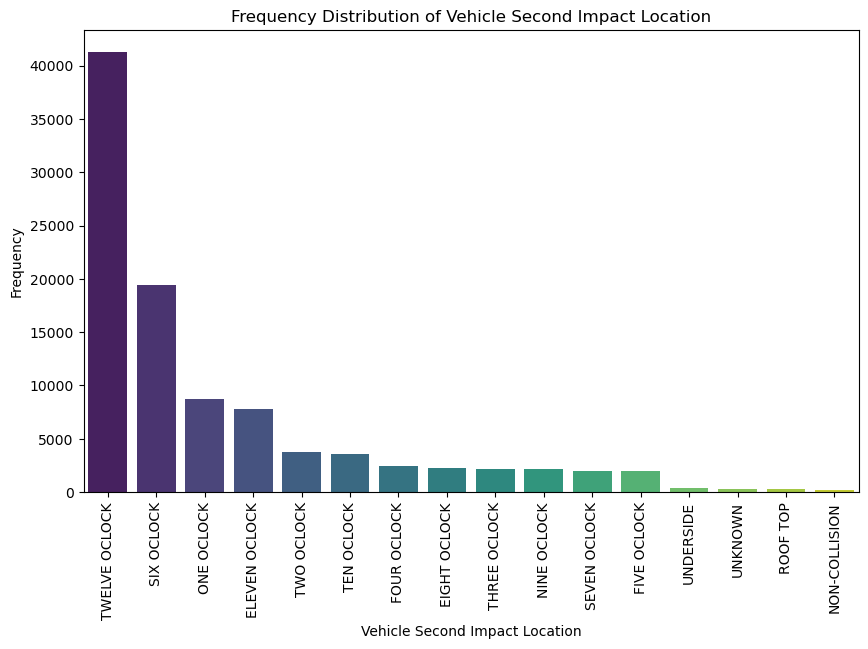

/Users/Monis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Monis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Monis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


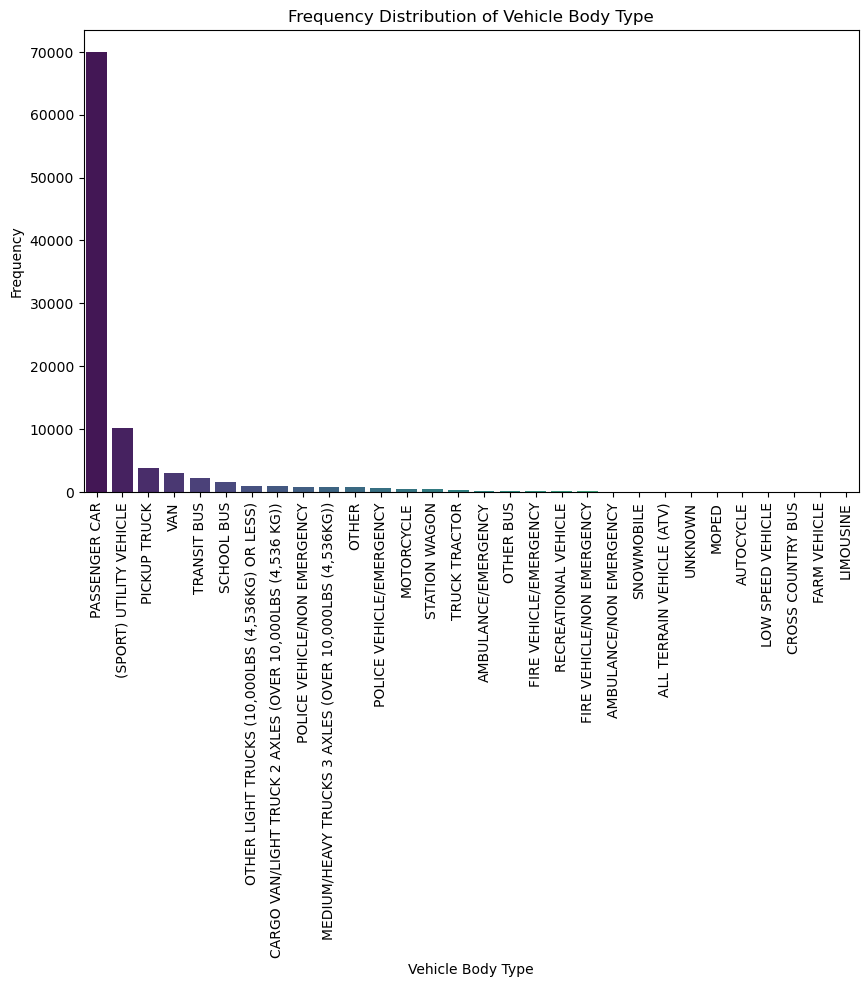

/Users/Monis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Monis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Monis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


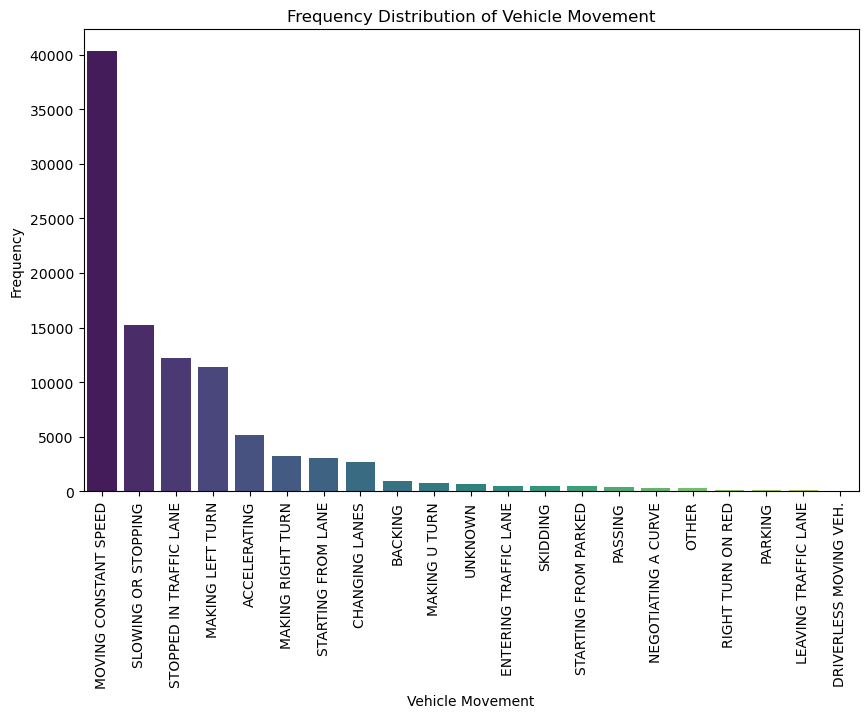

/Users/Monis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Monis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Monis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


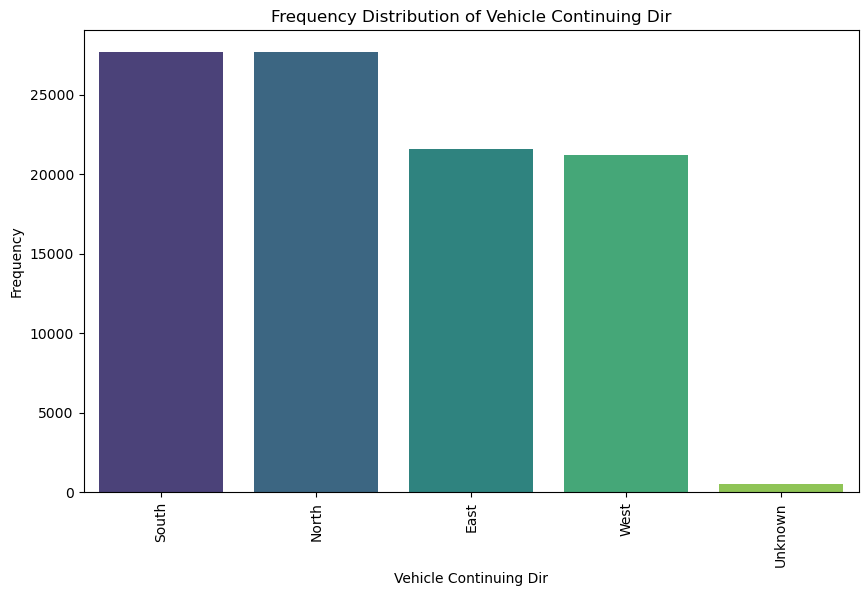

/Users/Monis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Monis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Monis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


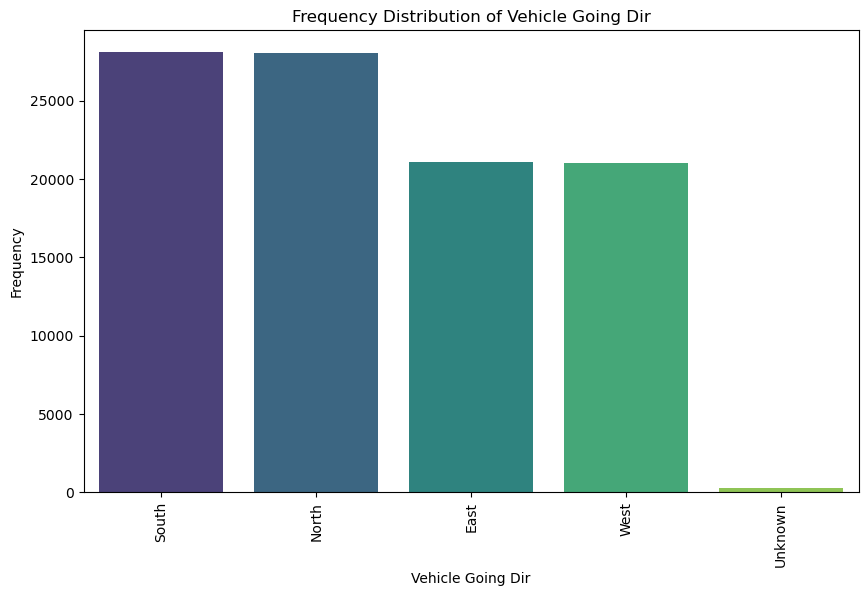

/Users/Monis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Monis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Monis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


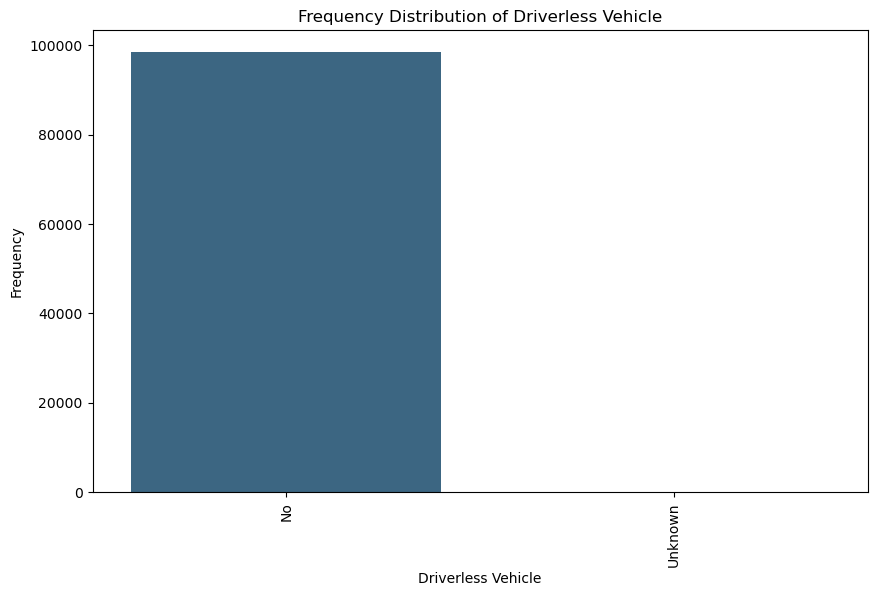

/Users/Monis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Monis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Monis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


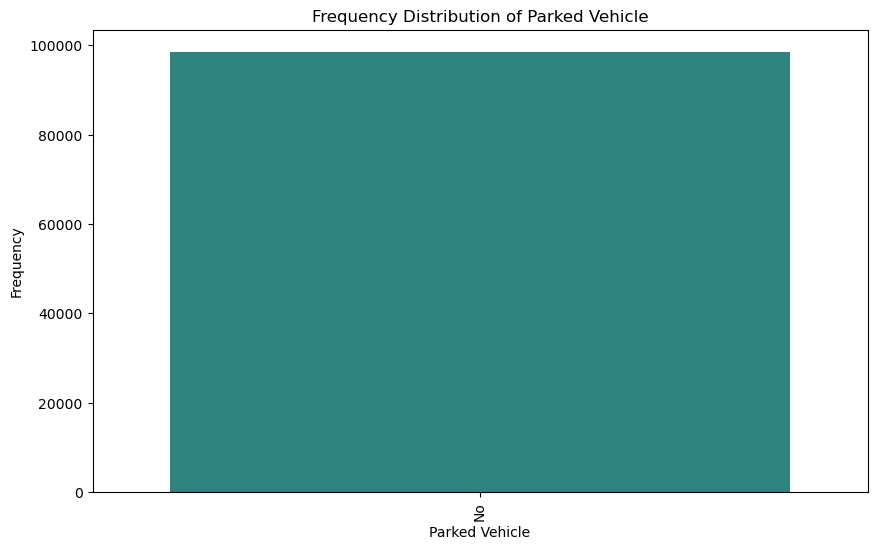

/Users/Monis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Monis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Monis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


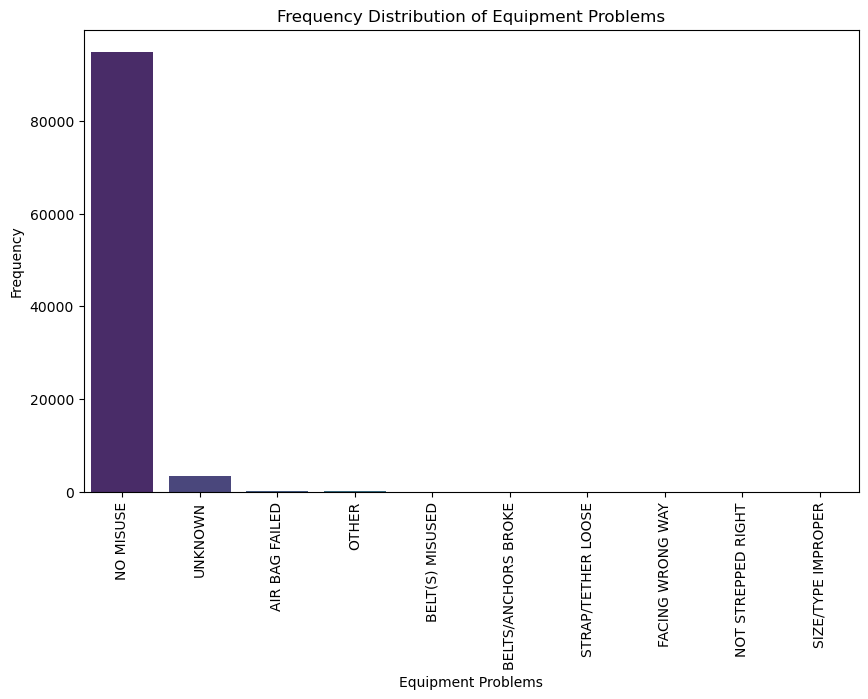

In [24]:
categorical_columns = df.select_dtypes(include=['object']).columns
exclude_columns = ['Local Case Number', 'Vehicle Make', 'Vehicle Model', 'Crash Time']
for col in categorical_columns:
    if col in exclude_columns:
        continue
    frequency_distribution = df[col].value_counts()    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=frequency_distribution.index, y=frequency_distribution.values, palette='viridis')    
    plt.title(f'Frequency Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)    
    plt.show()


/var/folders/q8/yn_y6xld29d7fddhs2p60jz80000gn/T/ipykernel_35133/2652989199.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time Interval'] = pd.cut(pd.to_datetime(df['Crash Time']).dt.hour, bins=time_bins, labels=time_labels, right=False)
/Users/Monis/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Monis/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(g

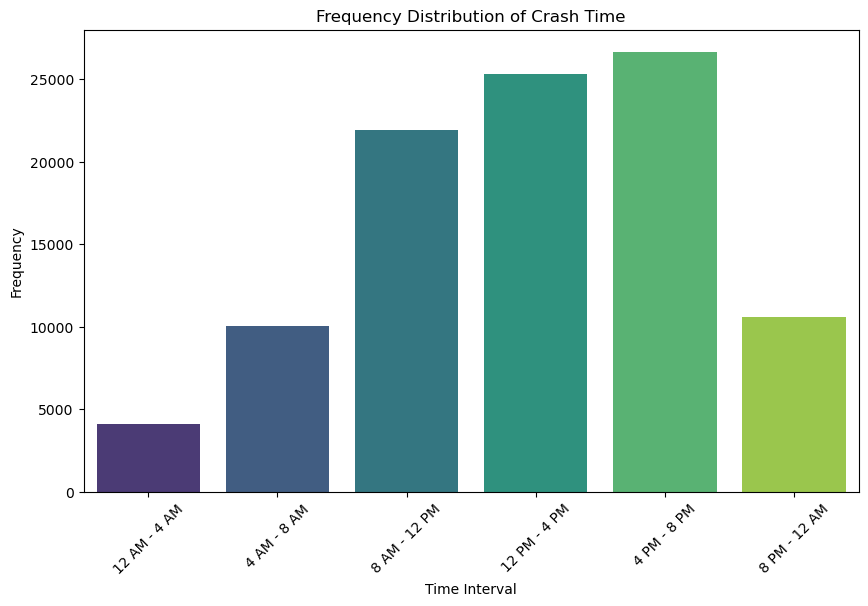

In [25]:
# Create a new DataFrame or Series for the categorized time intervals
time_bins = [0, 4, 8, 12, 16, 20, 24]  # Adjust as needed
time_labels = ['12 AM - 4 AM', '4 AM - 8 AM', '8 AM - 12 PM', '12 PM - 4 PM', '4 PM - 8 PM', '8 PM - 12 AM']
df['Time Interval'] = pd.cut(pd.to_datetime(df['Crash Time']).dt.hour, bins=time_bins, labels=time_labels, right=False)
# Create a countplot for the frequency distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Time Interval', palette='viridis')
plt.title('Frequency Distribution of Crash Time')
plt.xlabel('Time Interval')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [26]:

from scipy.stats import chi2_contingency

# Create a DataFrame with categorical data
columns_for_correlation = ['Weather','Collision Type','Light','Traffic Control','Driver Substance Abuse','Driver Distracted By','Speed Limit', 'Time Interval', 'Surface Condition', 'Injury Severity', 'Vehicle Damage Extent', 'Vehicle First Impact Location', 'Vehicle Second Impact Location', 'Vehicle Body Type', 'Vehicle Movement', 'Vehicle Continuing Dir', 'Vehicle Going Dir', 'Driverless Vehicle', 'Driver At Fault']
data = df[columns_for_correlation]

# Define a function to calculate Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Create an empty correlation matrix
num_features = len(data.columns)
correlation_matrix = np.zeros((num_features, num_features))

# Calculate Cramer's V for each pair of categorical variables
for i in range(num_features):
    for j in range(num_features):
        if i == j:
            correlation_matrix[i, j] = 1.0
        else:
            correlation_matrix[i, j] = cramers_v(data.iloc[:, i], data.iloc[:, j])

# Create a DataFrame from the correlation matrix
correlation_df = pd.DataFrame(correlation_matrix, columns=data.columns, index=data.columns)

# Print or visualize the correlation matrix
print(correlation_df)


                                 Weather  Collision Type     Light  \
Weather                         1.000000        0.032953  0.101205   
Collision Type                  0.032953        1.000000  0.080230   
Light                           0.101205        0.080230  1.000000   
Traffic Control                 0.023696        0.159443  0.093899   
Driver Substance Abuse          0.035799        0.064960  0.095489   
Driver Distracted By            0.016211        0.053671  0.032015   
Speed Limit                     0.016431        0.070021  0.029328   
Time Interval                   0.070474        0.094780  0.382207   
Surface Condition               0.400091        0.042451  0.087691   
Injury Severity                 0.007125        0.092221  0.014178   
Vehicle Damage Extent           0.029613        0.175713  0.048235   
Vehicle First Impact Location   0.016642        0.207060  0.031408   
Vehicle Second Impact Location  0.017284        0.206398  0.033244   
Vehicle Body Type   

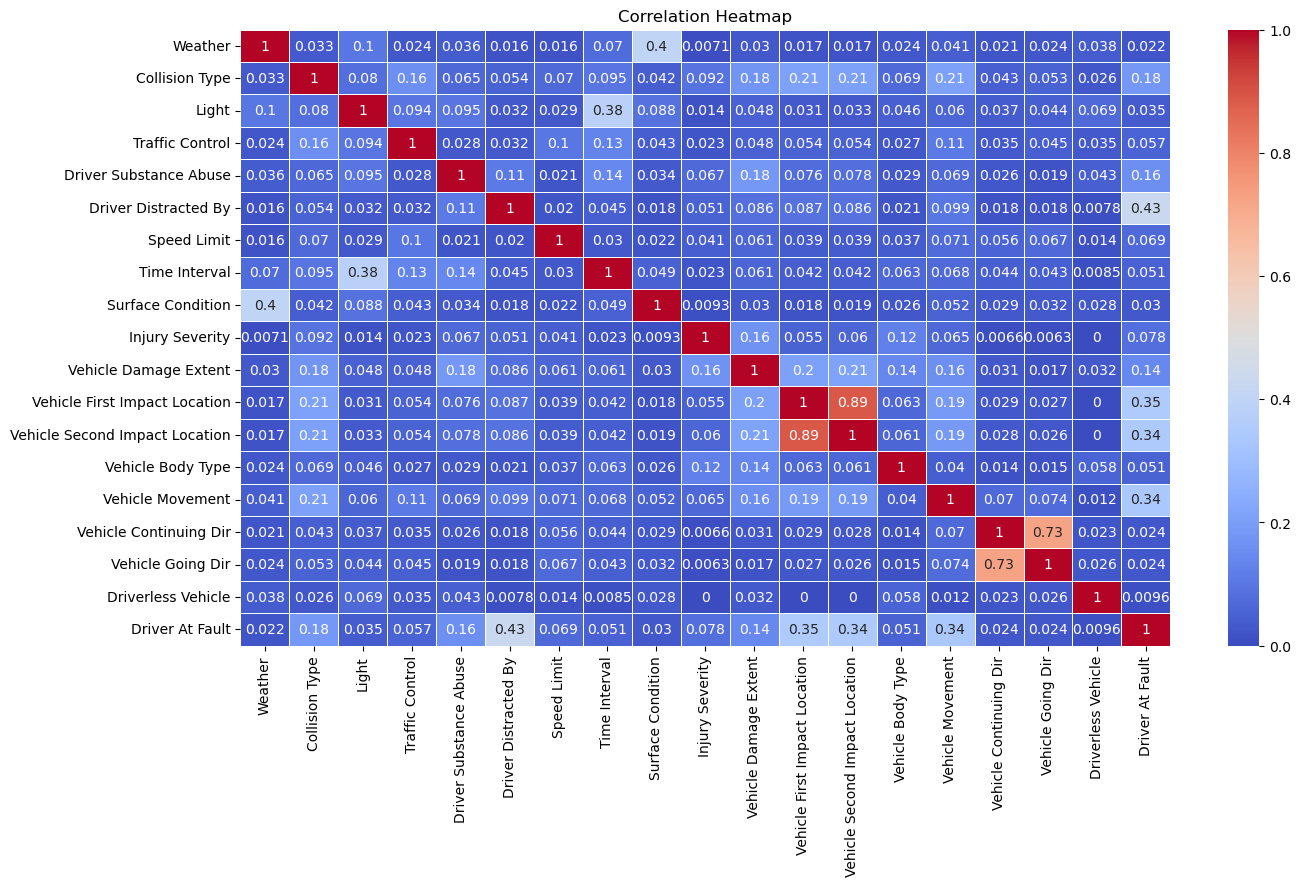

In [27]:
correlation_matrix = correlation_df
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [29]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.preprocessing import LabelEncoder

In [30]:
# target column Driver At Fault
df['Driver At Fault'].unique()

array(['Yes', 'No', 'Unknown'], dtype=object)

In [31]:
#num of unknown
(df['Driver At Fault']=='Unknown').sum()

2391

In [32]:
filtered_df = df[df['Driver At Fault'] != 'Unknown']

In [36]:
# select important features
columns_of_interest = ['Collision Type', 'Traffic Control', 'Driver Substance Abuse', 'Driver Distracted By', 'Speed Limit', 'Time Interval', 'Injury Severity', 'Vehicle Damage Extent', 'Vehicle First Impact Location', 'Vehicle Second Impact Location', 'Vehicle Body Type', 'Vehicle Movement']

# Create a copy of the DataFrame with selected columns
X = filtered_df[columns_of_interest].copy()

# y = filtered_df['Driver At Fault']  # Target variable
label_encoder = LabelEncoder()

# Create a copy of the DataFrame for the target variable
filtered_df_copy = filtered_df.copy()
filtered_df_copy['Driver At Fault'] = label_encoder.fit_transform(filtered_df_copy['Driver At Fault'])
y = filtered_df_copy['Driver At Fault']  # Target variable

# Divide the data into columns
categorical_cols = ['Collision Type', 'Traffic Control', 'Driver Substance Abuse', 'Driver Distracted By', 'Time Interval', 'Injury Severity', 'Vehicle Damage Extent', 'Vehicle First Impact Location', 'Vehicle Second Impact Location', 'Vehicle Body Type', 'Vehicle Movement']
numerical_cols = ['Speed Limit']

# Create a transformer
categorical_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse=False, drop='first'), categorical_cols)
    ],
    remainder='passthrough'  # Keep other columns unchanged
)

# Create a pipeline
from sklearn.pipeline import Pipeline

preprocessor = Pipeline(
    steps=[
        ('categorical', categorical_transformer)
    ]
)


In [37]:
X_transformed = preprocessor.fit_transform(X)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

/Users/Monis/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [38]:
# Create and train a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_dt_pred = dt_classifier.predict(X_test)
y_dt_pred_binary = label_encoder.transform(y_dt_pred)
dt_accuracy = accuracy_score(y_test, y_dt_pred)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.8666978727830654


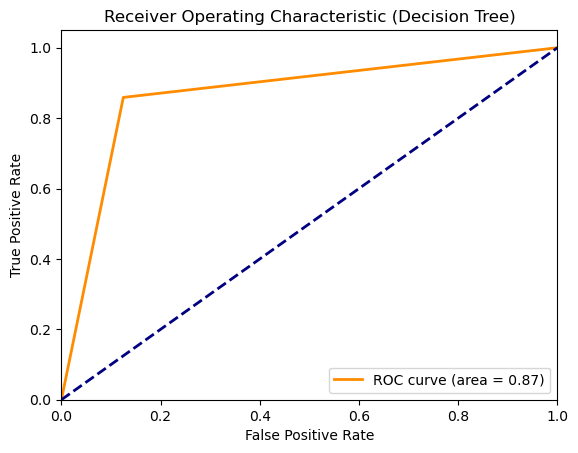

In [39]:

# calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_dt_pred_binary)

# calculate ROC value
roc_auc = auc(fpr, tpr)

# plot AUC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Decision Tree)')
plt.legend(loc="lower right")
plt.show()

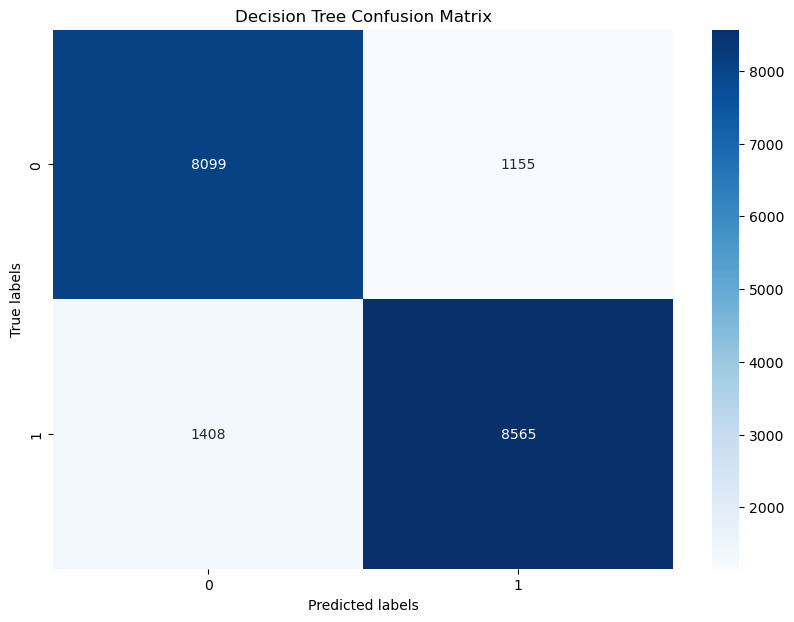

In [43]:
# Calculate the dt confusion matrix
dt_confusion = confusion_matrix(y_test, y_dt_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(dt_confusion, annot=True, fmt='g', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [44]:
# Create and train a Logistic Regression classifier
lr_classifier = LogisticRegression(solver='lbfgs', max_iter=1000)
lr_classifier.fit(X_train, y_train)
y_lr_pred = lr_classifier.predict(X_test)
y_lr_pred_binary = label_encoder.transform(y_lr_pred)
lr_accuracy = accuracy_score(y_test, y_lr_pred)
print("Logistic Regression Accuracy:", lr_accuracy)

Logistic Regression Accuracy: 0.8960316221979508


/Users/Monis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


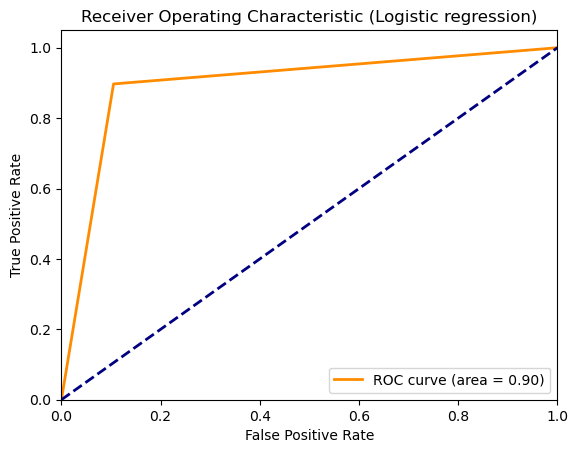

In [45]:

# calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_lr_pred_binary)

# calculate ROC value
roc_auc = auc(fpr, tpr)

# plot AUC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Logistic regression)')
plt.legend(loc="lower right")
plt.show()

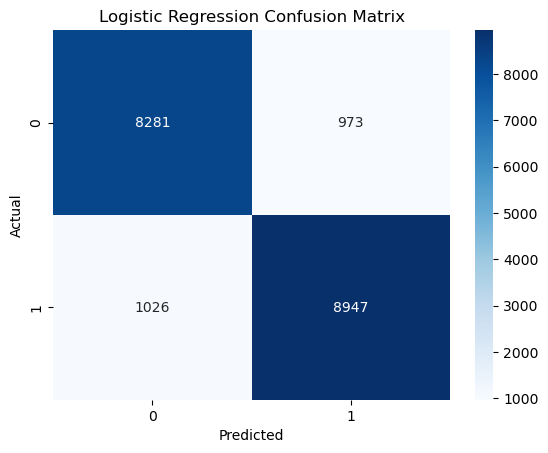

In [47]:
# Calculate the lg confusion matrix
lg_confusion = confusion_matrix(y_test, y_lr_pred)

# Plot the confusion matrix
sns.heatmap(lg_confusion, annot=True, fmt='g', cmap='Blues')  # 'g' format for integers
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [48]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(
    RandomForestClassifier(),
    param_distributions=param_dist,
    n_iter=1,  # Adjust the number of iterations
    cv=5
)

random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_

In [49]:
# Create and train a Random Forest classifier
best_rf_model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf']
)

# Fit the model with the training data
best_rf_model.fit(X_train, y_train)

y_rf_pred = best_rf_model.predict(X_test)
y_rf_pred_binary = label_encoder.transform(y_rf_pred)
rf_accuracy = accuracy_score(y_test, y_rf_pred)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.9082540177874864


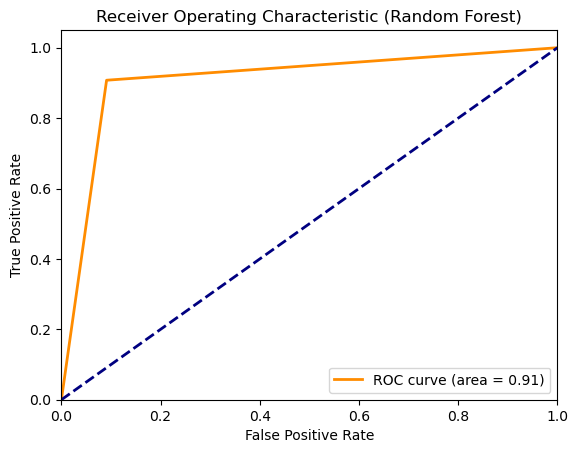

In [50]:

# calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_rf_pred_binary)

# calculate ROC value
roc_auc = auc(fpr, tpr)

# plot AUC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Random Forest)')
plt.legend(loc="lower right")
plt.show()

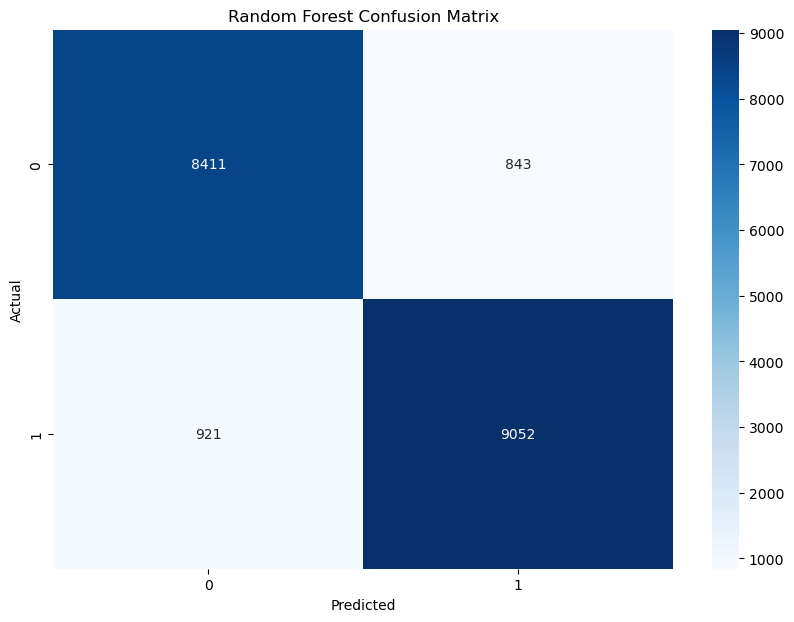

In [51]:
# Calculate the rf confusion matrix
rf_confusion = confusion_matrix(y_test, y_rf_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(rf_confusion, annot=True, fmt='g', cmap='Blues')  # 'g' format for integers
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [52]:
# Create and train a Support Vector Machine (SVM) classifier
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
y_svm_pred = svm_classifier.predict(X_test)
y_svm_pred_binary = label_encoder.transform(y_svm_pred)
svm_accuracy = accuracy_score(y_test, y_svm_pred)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.8816247984604982


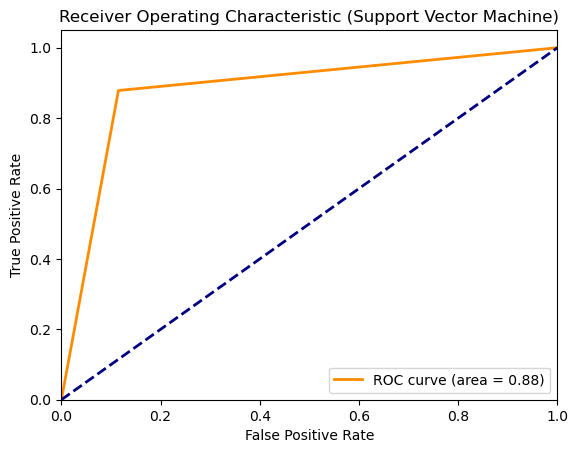

In [53]:

# calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_svm_pred_binary)

# calculate ROC value
roc_auc = auc(fpr, tpr)

# plot AUC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Support Vector Machine)')
plt.legend(loc="lower right")
plt.show()

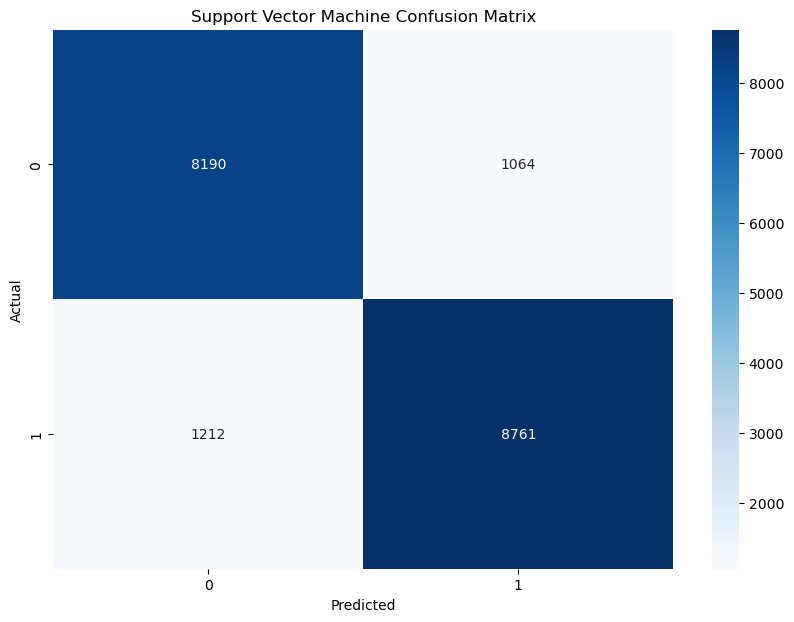

In [54]:
# Calculate the svm confusion matrix
svm_confusion = confusion_matrix(y_test, y_svm_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(svm_confusion, annot=True, fmt='g', cmap='Blues')  # 'g' format for integers
plt.title('Support Vector Machine Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.ensemble import StackingClassifier

# Initialize the base models
base_models = [
    ('lr', LogisticRegression(max_iter=1000)),  # Increased max_iter
    ('dt', DecisionTreeClassifier()),
    ('rf', RandomForestClassifier()),
    ('svm', SVC(probability=True))
]

# Initialize the Stacking Classifier
stacking_model = StackingClassifier(
    estimators=base_models, 
    final_estimator=LogisticRegression(max_iter=1000)  # Increased max_iter
)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the model on scaled data
stacking_model.fit(X_train_scaled, y_train)

# Make predictions
stacking_predictions = stacking_model.predict(X_test_scaled)

# Calculate accuracy
stacking_accuracy = accuracy_score(y_test, stacking_predictions)
print("Stacking Model Accuracy:", stacking_accuracy)

In [ ]:

# calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_stack_pred_binary)

# calculate ROC value
roc_auc = auc(fpr, tpr)

# plot AUC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Stack)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Calculate the stack confusion matrix
stack_confusion = confusion_matrix(y_test, stacking_predictions)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(stack_confusion, annot=True, fmt='g', cmap='Blues')  # 'g' format for integers
plt.title('Stack Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()